In [119]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
import sklearn
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
warnings.filterwarnings('ignore')

In [87]:
uploaded = files.upload()

Saving day.csv to day (3).csv


In [88]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [89]:
day_df.shape

(730, 16)

In [90]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [91]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [92]:
day_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [93]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='%d-%m-%Y')


In [94]:
day_df.dteday = day_df['dteday'].dt.day

In [95]:
day_df.dteday

0       1
1       2
2       3
3       4
4       5
       ..
725    27
726    28
727    29
728    30
729    31
Name: dteday, Length: 730, dtype: int64

In [96]:
duplicate = day_df[day_df.duplicated()]

In [97]:
duplicate.value_counts()

Series([], dtype: int64)

In [98]:
day_df = day_df.drop(['instant'], axis=1)

In [99]:
day_df["ratio_casual_registered"] = (day_df["casual"] / day_df["registered"])

In [100]:
day_df.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ratio_casual_registered
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,15.720548,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,0.237795
std,8.802278,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,0.191068
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,0.013353
25%,8.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,0.110513
50%,16.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,0.174887
75%,23.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,0.274001
max,31.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,1.042166


In [101]:
bike  = day_df[['dteday','season','yr','mnth','holiday','weekday','workingday', 'weathersit','temp','atemp', 'hum', 'windspeed','cnt','ratio_casual_registered']]

In [102]:
bike.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,ratio_casual_registered
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,15.720548,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849,0.237795
std,8.802278,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647,0.191068
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.013353
25%,8.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.110513
50%,16.000000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.174887
75%,23.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.274001
max,31.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.042166


In [103]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dteday                   730 non-null    int64  
 1   season                   730 non-null    int64  
 2   yr                       730 non-null    int64  
 3   mnth                     730 non-null    int64  
 4   holiday                  730 non-null    int64  
 5   weekday                  730 non-null    int64  
 6   workingday               730 non-null    int64  
 7   weathersit               730 non-null    int64  
 8   temp                     730 non-null    float64
 9   atemp                    730 non-null    float64
 10  hum                      730 non-null    float64
 11  windspeed                730 non-null    float64
 12  cnt                      730 non-null    int64  
 13  ratio_casual_registered  730 non-null    float64
dtypes: float64(5), int64(9)
me

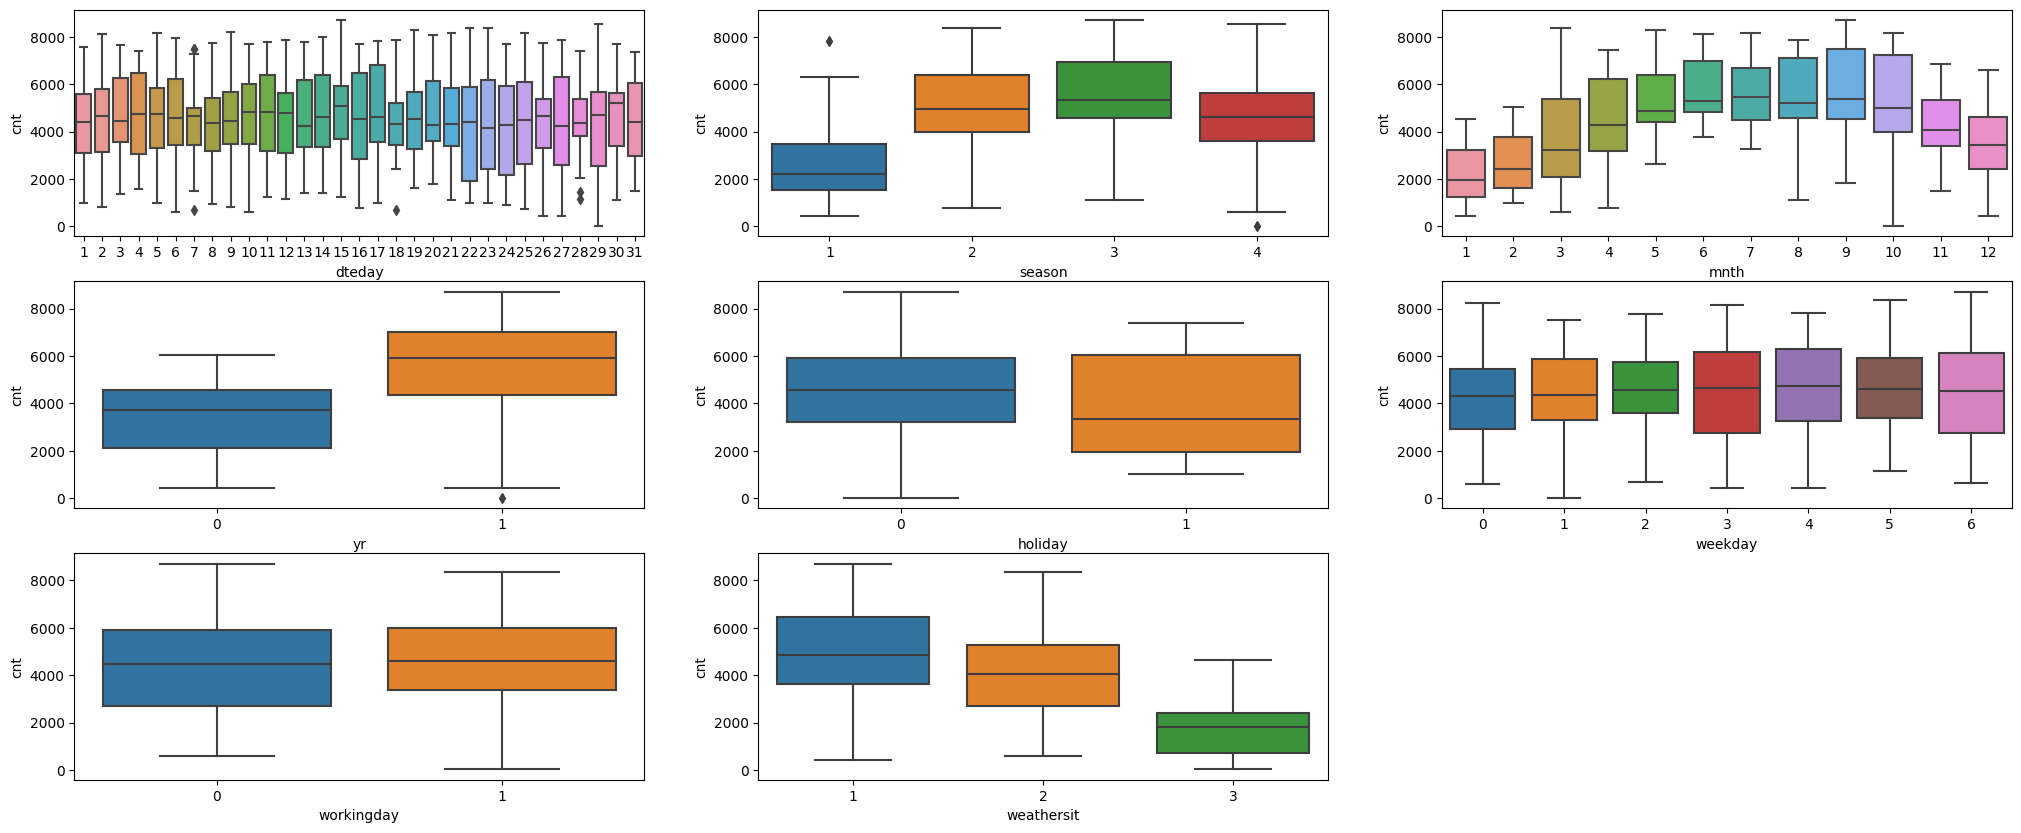

In [104]:
plt.figure(figsize =(25,10))
plt.subplot(3,3,1)
sns.boxplot(x='dteday', y='cnt', data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(3,3,8)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.show()

In [105]:
day_df = day_df.drop(['dteday'], axis=1)

In [106]:
bike = bike.drop(['dteday'], axis=1)

In [107]:
mnth = pd.get_dummies(bike['mnth'],drop_first=True, prefix='mnth_')
season = pd.get_dummies(bike['season'],drop_first=True, prefix='season_')
weekday = pd.get_dummies(bike['weekday'],drop_first=True, prefix='weekday_')
weathersit = pd.get_dummies(bike['weathersit'],drop_first=True, prefix='weathersit_')


In [108]:
bike = pd.concat([bike, mnth],axis = 1)
bike = pd.concat([bike, season],axis = 1)
bike = pd.concat([bike, weekday],axis = 1)
bike = pd.concat([bike, weathersit],axis = 1)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,season__3,season__4,weekday__1,weekday__2,weekday__3,weekday__4,weekday__5,weekday__6,weathersit__2,weathersit__3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0


In [109]:
bike = bike.drop('mnth',axis=1)
bike = bike.drop('season',axis=1)
bike = bike.drop('weekday',axis=1)
bike = bike.drop('weathersit',axis=1)

In [110]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state=100)

In [111]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed', 'ratio_casual_registered']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

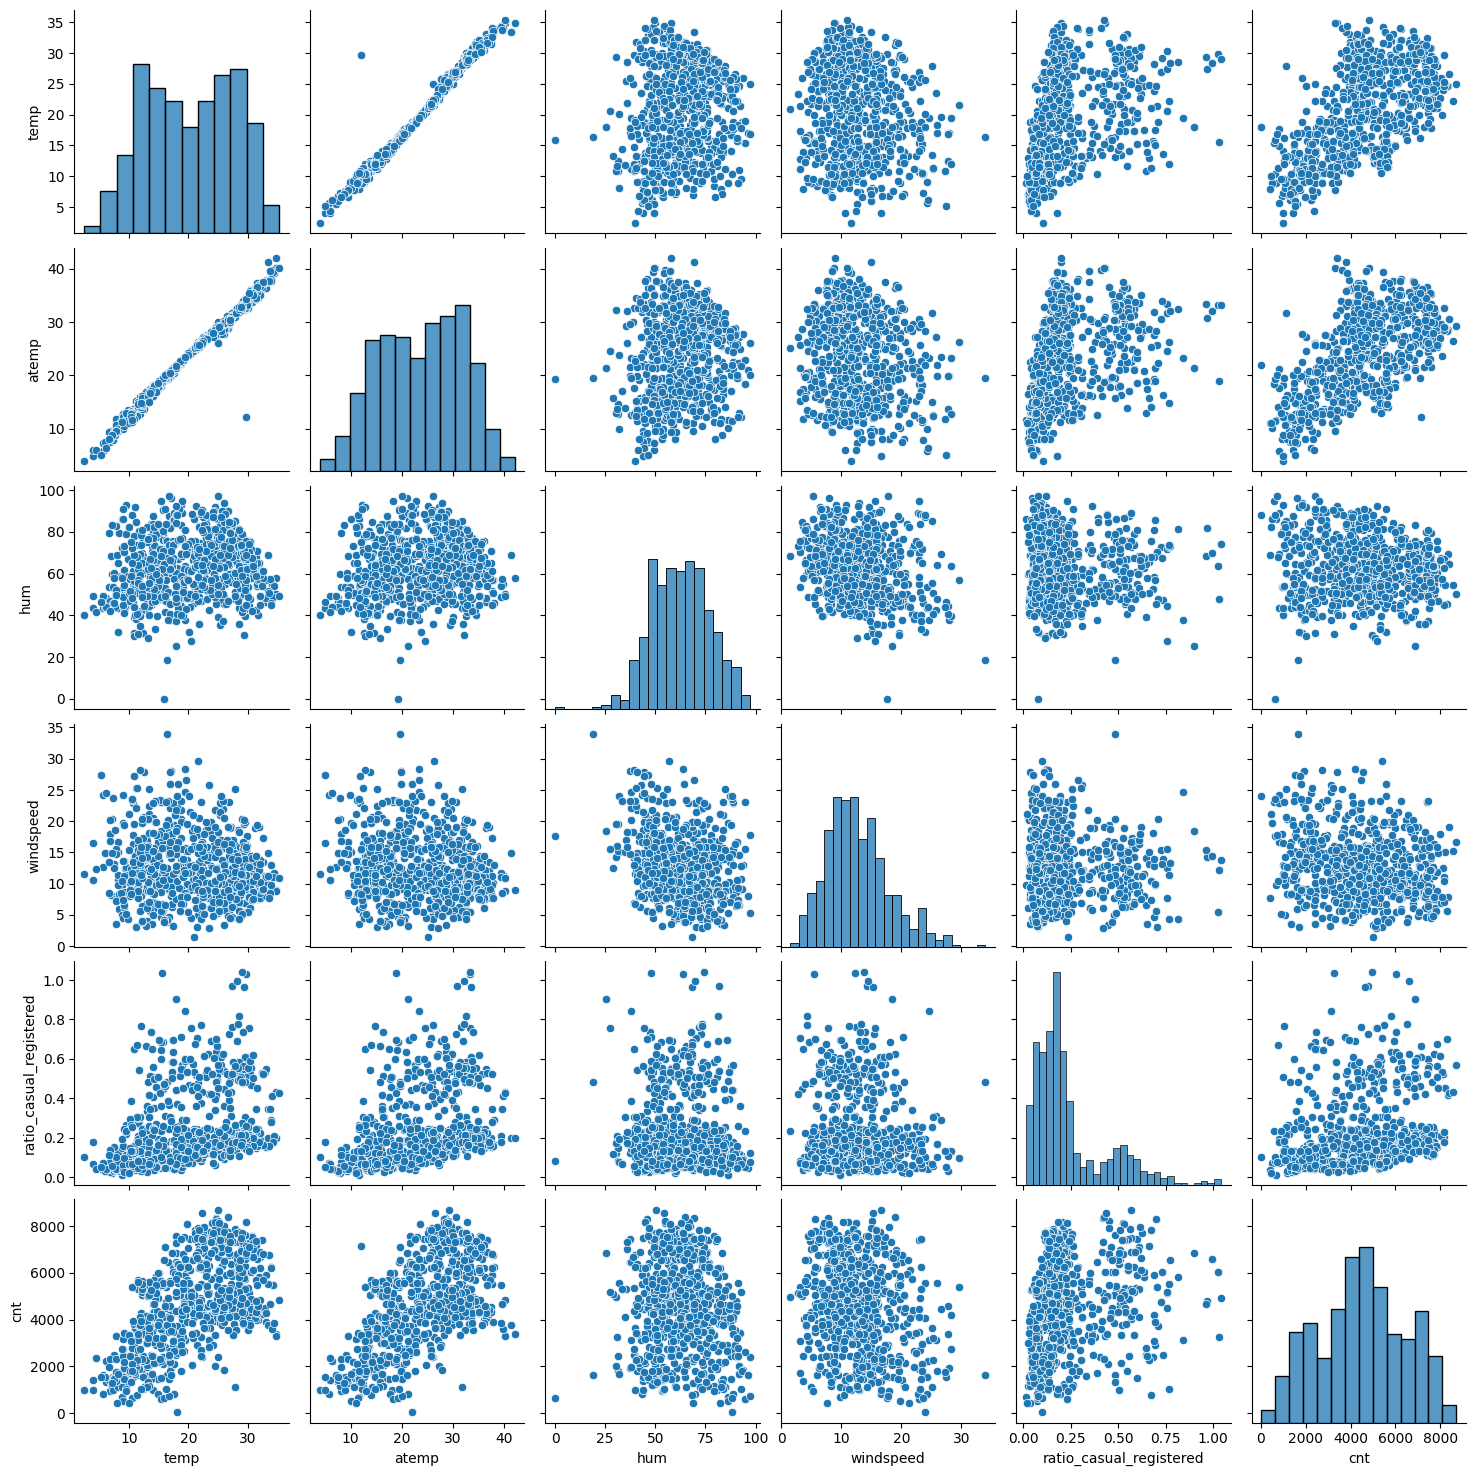

In [112]:
bike_num = bike[['temp','atemp','hum','windspeed','ratio_casual_registered','cnt']]
sns.pairplot(bike_num)
plt.show()
#linear relation between temp, atemp and cnt

In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yr                       510 non-null    int64  
 1   holiday                  510 non-null    int64  
 2   workingday               510 non-null    int64  
 3   temp                     510 non-null    float64
 4   atemp                    510 non-null    float64
 5   hum                      510 non-null    float64
 6   windspeed                510 non-null    float64
 7   cnt                      510 non-null    int64  
 8   ratio_casual_registered  510 non-null    float64
 9   mnth__2                  510 non-null    uint8  
 10  mnth__3                  510 non-null    uint8  
 11  mnth__4                  510 non-null    uint8  
 12  mnth__5                  510 non-null    uint8  
 13  mnth__6                  510 non-null    uint8  
 14  mnth__7                 

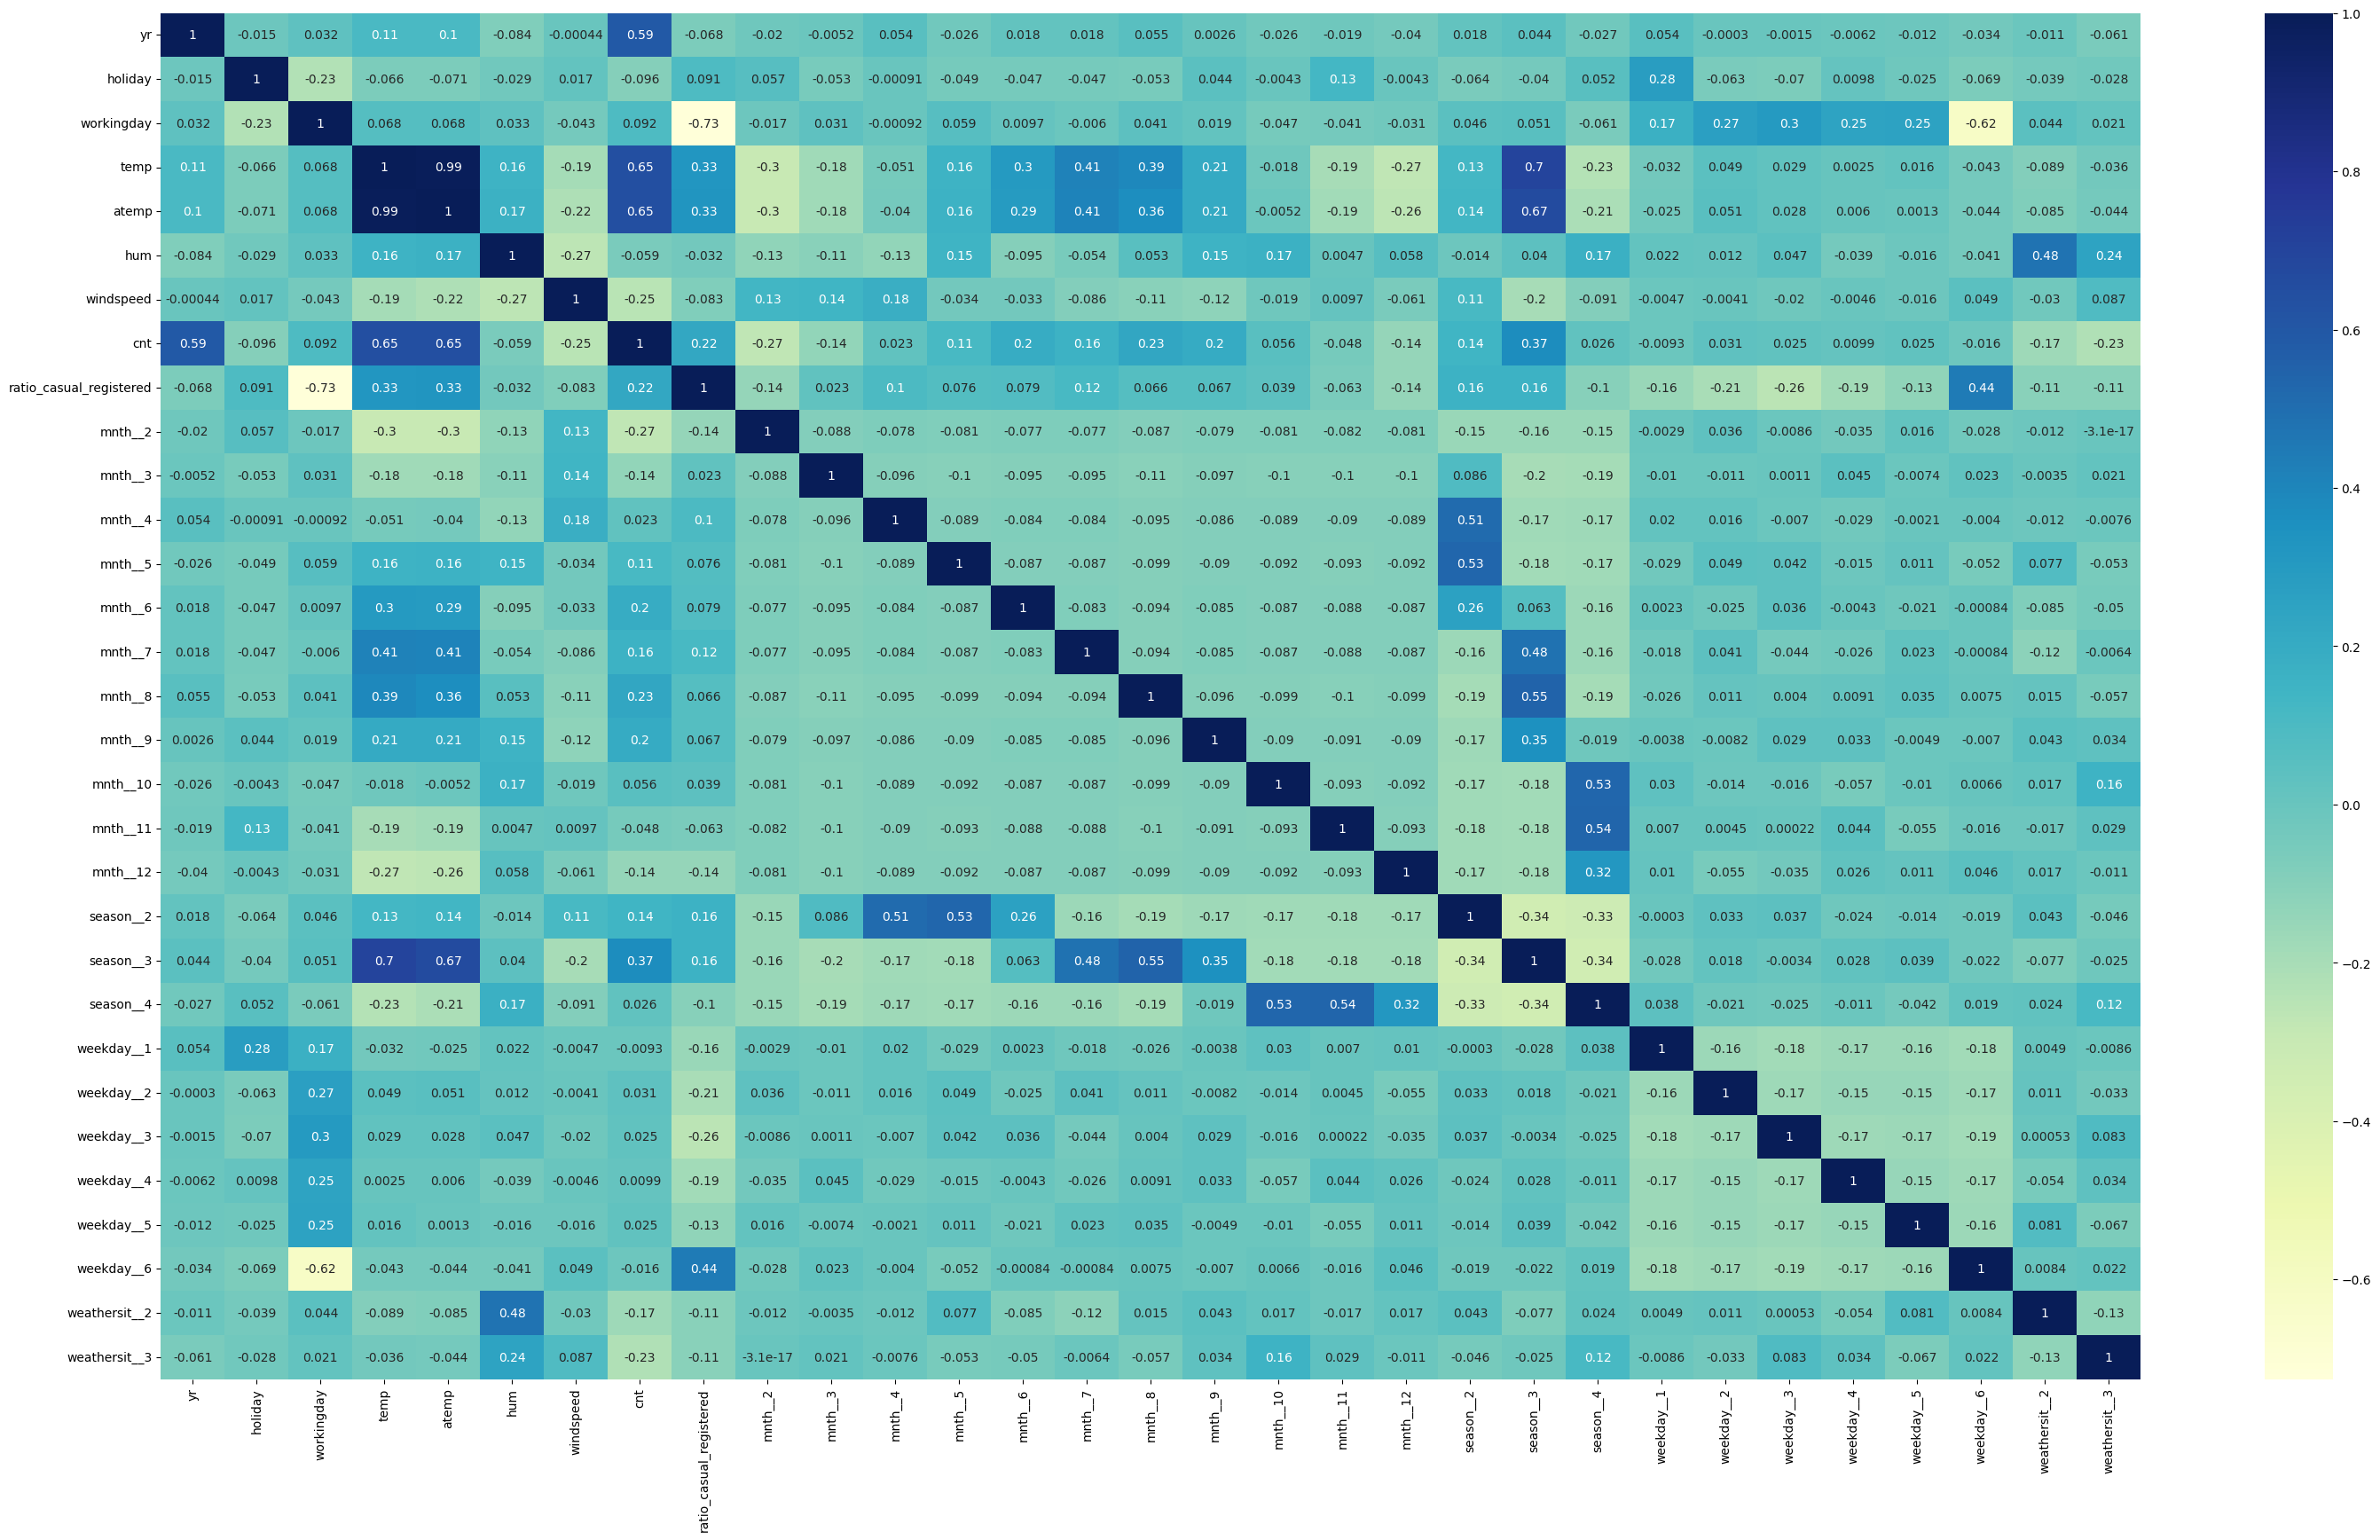

In [114]:
#Training the model
plt.figure(figsize = (36,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [115]:
#High correlation between cnt, atemp,yr, and temp
#Removing cnt and adding to y_train
y_train = df_train.pop('cnt');
x_train = df_train


In [116]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     101.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.35e-184
Time:                        15:27:39   Log-Likelihood:                -4086.5
No. Observations:                 510   AIC:                             8233.
Df Residuals:                     480   BIC:                             8360.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     957.5469    286.235      3.345      0.001     395.118    1519.975
yr                       2086.6697     69.930     29.840      0.000    1949.264    2224.076
holiday                  -292.9083    201.694     -1.452      0.147    -689.221     103.405
workingday                829.7978    122.309      6.784      0.000     589.470    1070.126
temp                     2735.9185   1215.816      2.250      0.025     346.940    5124.897
atemp                     531.8011   1176.192      0.452      0.651   -1779.320    2842.922
hum                     -1176.2886    329.344     -3.572      0.000   -1823.422    -529.155
windspeed               -1385.6460    228.230     -6.071      0.000   -1834.098    -937.194
ratio_casual_registered  1782.2192    367.943      4.844      0.000    1059.240    2505.198
mnth__2                   244.5294    175.501      1.393      0.164    -100.315     589.374
mnth__3                   402.7009    193.005      2.086      0.037      23.462     781.939
mnth__4                   401.2647    287.217      1.397      0.163    -163.093     965.623
mnth__5                   719.7738    307.966      2.337      0.020     114.646    1324.901
mnth__6                   640.2467    330.482      1.937      0.053      -9.123    1289.616
mnth__7                   270.7079    373.182      0.725      0.469    -462.565    1003.981
mnth__8                   728.4911    355.775      2.048      0.041      29.422    1427.560
mnth__9                  1186.5582    318.649      3.724      0.000     560.440    1812.677
mnth__10                  386.9778    297.020      1.303      0.193    -196.642     970.598
mnth__11                    2.4969    282.290      0.009      0.993    -552.179     557.173
mnth__12                   76.2241    226.079      0.337      0.736    -368.002     520.451
season__2                 700.4778    201.152      3.482      0.001     305.230    1095.726
season__3                 434.3382    255.172      1.702      0.089     -67.053     935.730
season__4                1471.0231    222.812      6.602      0.000    1033.216    1908.830
weekday__1                  3.5590     84.851      0.042      0.967    -163.166     170.284
weekday__2                 68.8872     98.531      0.699      0.485    -124.718     262.492
weekday__3                186.1396     93.808      1.984      0.048       1.815     370.465
weekday__4                122.4532     95.499      1.282      0.200     -65.195     310.102
weekday__5                155.8506     96.109      1.622      0.106     -32.996     344.697
weekday__6                498.5171    123.665      4.031      0.000     255.525     741.509
weathersit__2            -489.4772     88.882     -5.507      0.000    -664.123    -314.832
weathersit__3           -2070.2524    226.944  

In [144]:
#Using RFE
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm,n_features_to_select=13)
rfe = rfe.fit(x_train, y_train)

In [145]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('ratio_casual_registered', True, 1),
 ('mnth__2', False, 16),
 ('mnth__3', False, 8),
 ('mnth__4', False, 14),
 ('mnth__5', False, 5),
 ('mnth__6', False, 7),
 ('mnth__7', False, 15),
 ('mnth__8', True, 1),
 ('mnth__9', True, 1),
 ('mnth__10', False, 4),
 ('mnth__11', False, 18),
 ('mnth__12', False, 17),
 ('season__2', True, 1),
 ('season__3', False, 3),
 ('season__4', True, 1),
 ('weekday__1', False, 13),
 ('weekday__2', False, 12),
 ('weekday__3', False, 9),
 ('weekday__4', False, 11),
 ('weekday__5', False, 10),
 ('weekday__6', True, 1),
 ('weathersit__2', True, 1),
 ('weathersit__3', True, 1)]

In [146]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'ratio_casual_registered', 'mnth__8', 'mnth__9', 'season__2',
       'season__4', 'weekday__6', 'weathersit__2', 'weathersit__3'],
      dtype='object')

In [147]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = x_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     222.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.34e-197
Time:                        15:42:30   Log-Likelihood:                -4097.2
No. Observations:                 510   AIC:                             8222.
Df Residuals:                     496   BIC:                             8282.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [148]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range (X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,features,VIF
0,const,63.90
2,workingday,3.68
6,ratio_casual_registered,3.52
3,temp,1.97
4,hum,1.88
11,weekday__6,1.65
12,weathersit__2,1.57
9,season__2,1.47
7,mnth__8,1.44
10,season__4,1.32


Residual Analysis of the train data

In [149]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

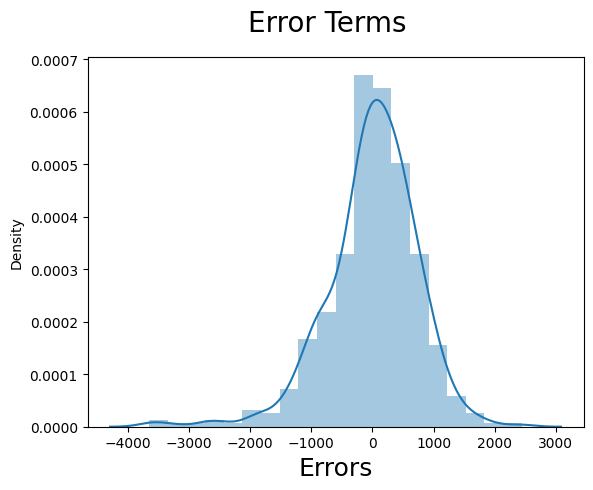

In [150]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Making Predictions

In [151]:
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [152]:
y_test = df_test.pop('cnt')
X_test = df_test


In [154]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [155]:
y_pred = lm.predict(X_test_new)


Text(0, 0.5, 'y_pred')

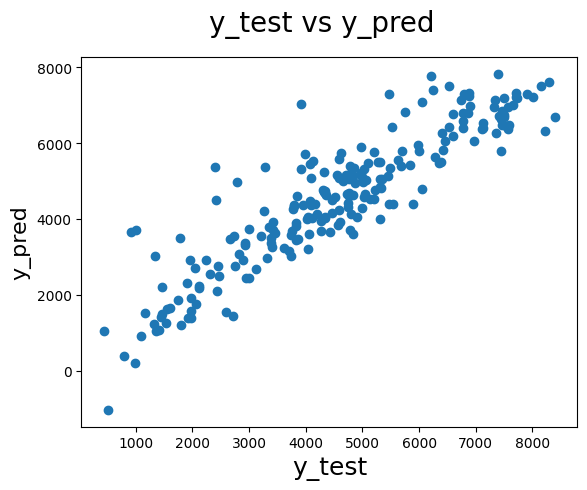

In [156]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [157]:
r2_score(y_test, y_pred)

0.8164635850887422